In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import spikeinterface as si
import matplotlib.pyplot as plt
import os
from matplotlib.backends.backend_pdf import PdfPages

from tqdm import tqdm


In [23]:
cluster_inf = pd.read_csv("cluster_inf.tsv", sep='\t')
spike_inf = pd.read_csv("spike_inf.tsv", sep='\t')

In [25]:
date_order = ['030222', '042422', '052322', '062322', '082422', 
              '092222', '102522', '112822', '122322', 
              '012123', '022423', '032323', '042323', '052423', '062323', '072123']

date_order_num = [int(i) for i in date_order]

In [28]:
date_markers = {
    30222: 'o',
    112822: 's',
    32323: 'D',
    72123: '^'
}

unique_neurons = cluster_inf['Neuron'].unique()
palette = sns.color_palette('tab10', len(unique_neurons))
neuron_colors = {neuron: color for neuron, color in zip(unique_neurons, palette)}

with PdfPages('figure/probe_group_view.pdf') as pdf:
    temp = cluster_inf[cluster_inf['probe_group'] == 1]
    fig, ax = plt.subplots(figsize=(3, 5))
    for date, marker in date_markers.items():
        date_data = temp[temp['date'] == date]
        sns.scatterplot(
            x='position_1', y='position_2', hue='Neuron', style='date',
            markers={date: marker}, data=date_data, ax=ax, palette=neuron_colors, s=300
        )
    ax.set_title(f'Probe Group: {1}')
    ax.set_xlabel('Position 1')
    ax.set_ylabel('Position 2')
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(-10, 60)
    ax.set_ylim(-10, 110)
    ax.legend().remove()
    pdf.savefig(fig)
    plt.close(fig)

    temp = cluster_inf[cluster_inf['probe_group'] == 2]
    fig, ax = plt.subplots(figsize=(3, 5))
    for date, marker in date_markers.items():
        date_data = temp[temp['date'] == date]
        sns.scatterplot(
            x='position_1', y='position_2', hue='Neuron', style='date',
            markers={date: marker}, data=date_data, ax=ax, palette=neuron_colors, s=300
        )
    ax.set_title(f'Probe Group: {2}')
    ax.set_xlabel('Position 1')
    ax.set_ylabel('Position 2')
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(140, 210)
    ax.set_ylim(190, 310)
    ax.legend().remove()
    pdf.savefig(fig)
    plt.close(fig)

    temp = cluster_inf[cluster_inf['probe_group'] == 3]
    fig, ax = plt.subplots(figsize=(3, 5))
    for date, marker in date_markers.items():
        date_data = temp[temp['date'] == date]
        sns.scatterplot(
            x='position_1', y='position_2', hue='Neuron', style='date',
            markers={date: marker}, data=date_data, ax=ax, palette=neuron_colors, s=300
        )
    ax.set_title(f'Probe Group: {3}')
    ax.set_xlabel('Position 1')
    ax.set_ylabel('Position 2')
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(240, 360)
    ax.set_ylim(390, 510)
    ax.legend().remove()
    pdf.savefig(fig)
    plt.close(fig)

    temp = cluster_inf[cluster_inf['probe_group'] == 4]
    fig, ax = plt.subplots(figsize=(3, 5))
    for date, marker in date_markers.items():
        date_data = temp[temp['date'] == date]
        sns.scatterplot(
            x='position_1', y='position_2', hue='Neuron', style='date',
            markers={date: marker}, data=date_data, ax=ax, palette=neuron_colors, s=300
        )
    ax.set_title(f'Probe Group: {4}')
    ax.set_xlabel('Position 1')
    ax.set_ylabel('Position 2')
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(440, 510)
    ax.set_ylim(190, 310)
    ax.legend().remove()
    pdf.savefig(fig)
    plt.close(fig)

    temp = cluster_inf[cluster_inf['probe_group'] == 5]
    fig, ax = plt.subplots(figsize=(3, 5))
    for date, marker in date_markers.items():
        date_data = temp[temp['date'] == date]
        sns.scatterplot(
            x='position_1', y='position_2', hue='Neuron', style='date',
            markers={date: marker}, data=date_data, ax=ax, palette=neuron_colors, s=300
        )
    ax.set_title(f'Probe Group: {5}')
    ax.set_xlabel('Position 1')
    ax.set_ylabel('Position 2')
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(590, 660)
    ax.set_ylim(-10, 110)
    ax.legend().remove()
    pdf.savefig(fig)
    plt.close(fig)

In [29]:
displacement_df_position_1 = pd.DataFrame()
displacement_df_position_2 = pd.DataFrame()

for neuron in cluster_inf['Neuron'].unique():
            temp = cluster_inf[cluster_inf['Neuron'] == neuron]
            displacement_1 = []
            displacement_2 = []
            for date in date_order_num:
                displacement_1.append(temp[temp['date'] == date]['position_1'].values.mean() - temp[temp['date'] == 30222]['position_1'].values.mean())
                displacement_2.append(temp[temp['date'] == date]['position_2'].values.mean() - temp[temp['date'] == 30222]['position_2'].values.mean())
            displacement_df_position_1[neuron] = displacement_1
            displacement_df_position_2[neuron] = displacement_2
        

In [30]:
months_to_plot = [2, 4, 8, 12, 16]  
n_months = len(months_to_plot)

colors = sns.color_palette("viridis", n_colors=n_months)

with PdfPages('figure/displacement_kde.pdf') as pdf:
    for idx, m in enumerate(months_to_plot):
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.plot(0, 0, 'ko', markersize=8, zorder=10)  
        data_month = pd.concat((
            displacement_df_position_1.iloc[m-1, :], 
            displacement_df_position_2.iloc[m-1, :]), axis=1)
        
        sns.kdeplot(
            x = displacement_df_position_1.iloc[m-1, :],
            y=displacement_df_position_2.iloc[m-1, :],
            ax=ax,
            linewidth=1.5,
            fill=False,  
            label=f'Month {m}',
            thresh=0.35,
            levels=6,
            common_norm=False  
        )

        ax.set_xlabel('Position Value', fontsize=12)
        ax.set_ylabel('Density', fontsize=12)
        ax.set_ylim(-10, 10)
        ax.set_xlim(-10, 10)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='both', which='major', labelsize=10)


        plt.tight_layout()
        pdf.savefig()
        plt.close()

In [31]:
date_groups = cluster_inf.groupby('date')
result_matrix = {}

for date, group in date_groups:
    neurons = group.set_index('Neuron')[['position_1', 'position_2']]
    neuron_list = sorted(neurons.index.unique())
    n = len(neuron_list)
    
    dist_matrix = np.zeros((n, n), dtype=float)
    
    for i in range(n):
        for j in range(n):
            if i == j:
                dist_matrix[i][j] = 0 
            else:
                pos_i = neurons.loc[neuron_list[i]]
                pos_j = neurons.loc[neuron_list[j]]
                dist = np.sqrt((pos_i['position_1'].mean()-pos_j['position_1'].mean())**2 + (pos_i['position_2'].mean()-pos_j['position_2'].mean())**2)
                dist_matrix[i][j] = dist
    
    result_matrix[date] = pd.DataFrame(dist_matrix, index=neuron_list)

In [ ]:
date_order = ['030222', '042422', '052322', '062322', '082422', 
              '092222', '102522', '112822', '122322', 
              '012123', '022423', '032323', '042323', '052423', '062323', '072123']

In [32]:
from itertools import combinations

displacement_dict = {}
for probe in cluster_inf['probe_group']:
    temp = cluster_inf[cluster_inf['probe_group'] == probe]
    month_groups = temp.groupby('date')

    month_pairs = [(30222, 42422),
                (30222, 62322),
                (30222, 112822),
                (30222, 22423),
                (30222, 72123)]

    all_neurons = sorted(temp['Neuron'].unique())
    n_neurons = len(all_neurons)
    n_pairs = len(month_pairs)

    distance_matrix = np.full((n_pairs, n_neurons, n_neurons), np.nan)

    for pair_idx, (month_a, month_b) in enumerate(month_pairs):
        group_a = month_groups.get_group(month_a).set_index('Neuron')[['position_1', 'position_2']]
        group_b = month_groups.get_group(month_b).set_index('Neuron')[['position_1', 'position_2']]
        
        for i, neuron_i in enumerate(all_neurons):
            for j, neuron_j in enumerate(all_neurons):
                if (neuron_i in group_a.index) and (neuron_j in group_b.index):
                    pos_i = group_a.loc[neuron_i]
                    pos_j = group_b.loc[neuron_j]
                    distance = np.sqrt((pos_i['position_1'].mean()-pos_j['position_1'].mean())**2 + (pos_i['position_2'].mean()-pos_j['position_2'].mean())**2)
                    distance_matrix[pair_idx, i, j] = distance
    displacement_dict[probe] = distance_matrix

In [33]:

with PdfPages("figure/hist_displacement.pdf") as pdf:
    for month in range(5):
        fig, ax = plt.subplots(figsize=(4, 4))
        df_1 = []
        df_2 = []

        for probe in displacement_dict.keys():
            df_1.append([displacement_dict[probe][month, i, i] for i in range(displacement_dict[probe].shape[1])])
            df_2.append(displacement_dict[probe].flatten())

        df_1 = flattened_list = np.concatenate(df_1)
        df_2 = flattened_list = np.concatenate(df_2)
        sns.ecdfplot(df_1, color='#2980b9', label='Within-neuron displacement', linewidth=2, ax=ax)
        sns.ecdfplot(df_2, color='orange', label='Across-neuron displacement', linewidth=2, ax=ax)

        ax.spines['top'].set_visible(False) 
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(1.5)  
        ax.spines['bottom'].set_linewidth(1.5)
        pdf.savefig()
        plt.close()

In [34]:
trigger_time = pd.read_csv("/media/ubuntu/sda/data/mouse5/output/analysis_natural_image/01_get_trigger/trigger_time.tsv", sep = '\t').iloc[:, 1:]

In [35]:
from scipy.stats import  pearsonr
firing_rate_dict = {}
correlation_dict = {}

for date in spike_inf['date'].unique():
    spike_inf_temp = spike_inf[spike_inf['date'] == date]
    firing_rate_dict[date] = {}
    trigger_time_temp = trigger_time[trigger_time['date'] == int(date)]
    for image in trigger_time_temp['image'].unique():
        firing_rate_dict[date][image] = pd.DataFrame()
        trigger_time_temp_temp = trigger_time_temp[trigger_time_temp['image'] == image]
        for image_order in trigger_time_temp_temp['order'].sort_index().values.tolist():
            trigger_time_temp_temp_temp = trigger_time_temp_temp[trigger_time_temp_temp['order'] == image_order]
            temp = spike_inf_temp[(spike_inf_temp['time'] > int(trigger_time_temp_temp_temp['start'].values)) & (spike_inf_temp['time'] < int(trigger_time_temp_temp_temp['end'].values))]
            firing_rate_dict[date][image] = pd.concat((firing_rate_dict[date][image], pd.DataFrame(temp['Neuron'].value_counts()).sort_index()), axis=1)
        firing_rate_dict[date][image] = firing_rate_dict[date][image].fillna(0)

    correlation_dict[date] = {}
    for key in sorted(list(firing_rate_dict[date].keys())):
        num = firing_rate_dict[date][key].shape[1]
        correlation_dict[date][key] = np.zeros((num, num))
        for i in range(num):
            for j in range(num):
                correlation_dict[date][key][i, j], _ = pearsonr(firing_rate_dict[date][key].iloc[:, i].values.tolist(), firing_rate_dict[date][key].iloc[:, j].values.tolist())


In [36]:
outlier = []
for date in correlation_dict.keys():
    for image in range(1, 118):
        mean = (correlation_dict[date][image].sum(axis = 0)-1)/(len(correlation_dict[date][image]) - 1)
        for i in range(len(mean)):
            if mean[i] <= 0.6:
                outlier.append(f'{date}_{image}_{i}')

In [37]:
import pickle
with open('outlier.pkl', 'wb') as f:
    pickle.dump(outlier, f)

In [38]:
correlation_mean = pd.DataFrame()
for date in correlation_dict.keys():
    temp = []
    for image, df in correlation_dict[date].items():
        df = df.mean().mean()
        temp.append(df)
    correlation_mean = pd.concat((correlation_mean, pd.DataFrame(temp, columns=[date])),axis=1)

correlation_mean = correlation_mean[date_order_num]

In [39]:
with PdfPages("figure/similarity_within_dates.pdf") as pdf:
    mean = correlation_mean.mean(axis=0)
    std = correlation_mean.std(axis=0)

    plt.figure(figsize=(6, 3))
    sns.lineplot(x = range(16),
                 y = mean,
                 color = 'black')
    sns.scatterplot(x = range(16),
                    y = mean,
                    size=30,
                    color = "black",
                    legend=False)
    plt.fill_between(x  = range(16), 
                     y1=mean - std,
                     y2=mean + std,
                     color = 'grey',
                     alpha = 0.2)
    plt.xticks([])
    plt.ylim(0, 1)
    pdf.savefig()
    plt.close()

In [40]:
mean_similarity_dict = {}
for date in spike_inf['date'].unique():
    mean_similarity_dict[date] = {}
    for key in sorted(list(firing_rate_dict[date].keys())):
        mean_similarity = np.mean(correlation_dict[date][key])
        mean_similarity_dict[date][key] = mean_similarity

mean_similarity_df = pd.DataFrame(mean_similarity_dict).T

mean_similarity_df = mean_similarity_df.loc[date_order_num]
mean_similarity_df.index = date_order  

with PdfPages('figure/ER_similarity_lineplot.pdf') as pdf:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    for key in mean_similarity_df.columns:
        ax.plot(mean_similarity_df.index, mean_similarity_df[key])
    
    sns.lineplot(x = range(16),
                 y = mean,
                 color = 'black', linewidth = 4)
    sns.scatterplot(x = range(16),
                    y = mean,
                    size=500,
                    color = "black",
                    legend=False)
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Mean Similarity')
    ax.set_title('Mean Similarity Over Time for Each Image')
    ax.set_ylim(0, 1)    
    pdf.savefig(fig)
    plt.close(fig)

In [41]:
with PdfPages("figure/raster_overall.pdf") as pdf:
    for neuron in spike_inf['Neuron'].unique():
        neuron_df = spike_inf[spike_inf['Neuron'] == neuron]

        fig, ax = plt.subplots(figsize = (12, 7.5))

        for index, row in trigger_time.iterrows():
            date = row['date']
            image_order = row['order']
            start = row['start'] - 5000
            end = row['end'] + 10000
            
            filtered_spikes = neuron_df[(neuron_df['date'] == date) & 
                                        (neuron_df['time'] >= start) & 
                                        (neuron_df['time'] <= end)]
            
            if not filtered_spikes.empty:
                ax.plot(filtered_spikes['time'] - start, [index] * len(filtered_spikes), marker='|', mew=1, markersize=3, ls='', color='k')

        ax.set_yticks([])
        #ax.axvspan(1 + (5000 - 1) * 0.5, 1 + (5000 - 1), color='gray', alpha=0.3)

        ax.set_xlabel('time (s)')
        ax.set_ylabel("")
        ax.set_title(f'Raster Plot for {neuron}')

        pdf.savefig(fig)
        plt.close()

In [42]:

with PdfPages("figure/peth_lineplot_all.pdf") as pdf:
    for neuron in spike_inf['Neuron'].unique():
        print(neuron)
        plt.figure(figsize=(4, 2.5))
        spike_rates_all = np.empty((99))

        for image in range(1, 118):
            neuron_df = spike_inf[spike_inf['Neuron'] == neuron]

            dates = trigger_time[trigger_time['image'] == image]['date'].unique()
            date_indices = np.arange(len(dates))  

            spike_rates = []
            std_rates = []

            for date in dates:
                trigger_time_temp = trigger_time[(trigger_time['image'] == image) & (trigger_time['date'] == date)]
                all_spikes = []

                for index, row in trigger_time_temp.iterrows():
                    start = row['start'] - 5000 
                    end = row['end'] + 10000

                    filtered_spikes = neuron_df[(neuron_df['date'] == date) &
                                                (neuron_df['time'] >= start) &
                                                (neuron_df['time'] <= end)]

                    if not filtered_spikes.empty:
                        relative_spikes = filtered_spikes['time'] - start
                        all_spikes.extend(relative_spikes)

                if all_spikes:
                    time_bins = np.linspace(0, max(all_spikes), 100)
                    spike_counts, _ = np.histogram(all_spikes, bins=time_bins)
                    spike_rate = spike_counts / (time_bins[1] - time_bins[0])
                    spike_rates.append(spike_rate)
                spike_rates_all = np.vstack((spike_rates_all, spike_rates))

        mean_spike_rate = np.mean(spike_rates, axis=0)
        std_spike_rate = np.std(spike_rates, axis=0)

        plt.plot(time_bins[:-1], mean_spike_rate, color='k', linewidth = 2)
        plt.plot(time_bins[:-1], mean_spike_rate - std_spike_rate, color='lightgray', alpha=0.7, linewidth = 1)
        plt.plot(time_bins[:-1], mean_spike_rate + std_spike_rate, color='lightgray', alpha=0.7, linewidth = 1)
        plt.title(neuron)
        plt.xticks([])
        plt.yticks([])
        pdf.savefig()
        plt.close()

Neuron_6
Neuron_3
Neuron_2
Neuron_1
Neuron_5
Neuron_4
Neuron_7


In [43]:
mean_spike_rate_dict = {}

with PdfPages("figure/peth_lineplot.pdf") as pdf:
    for image in range(1, 118):
        fig, axes = plt.subplots(4, 6, figsize=(30, 16))
        axes = axes.flatten()
        num = 0
        image_mean_spike_rate_data = []
        for neuron in spike_inf['Neuron'].unique():
            ax = axes[num]
            neuron_df = spike_inf[spike_inf['Neuron'] == neuron]

            dates = trigger_time[trigger_time['image'] == image]['date'].unique()
            date_indices = np.arange(len(dates))  

            spike_rates = []
            std_rates = []

            for date in dates:
                trigger_time_temp = trigger_time[(trigger_time['image'] == image) & (trigger_time['date'] == date)]
                all_spikes = []

                for index, row in trigger_time_temp.iterrows():
                    start = row['start'] - 5000
                    end = row['end'] + 10000

                    filtered_spikes = neuron_df[(neuron_df['date'] == date) &
                                                (neuron_df['time'] >= start) &
                                                (neuron_df['time'] <= end)]

                    if not filtered_spikes.empty:
                        relative_spikes = filtered_spikes['time'] - start
                        all_spikes.extend(relative_spikes)

                if all_spikes:
                    time_bins = np.linspace(0, max(all_spikes), 100)
                    spike_counts, _ = np.histogram(all_spikes, bins=time_bins)
                    spike_rate = spike_counts / (time_bins[1] - time_bins[0])
                    spike_rates.append(spike_rate)

            mean_spike_rate = np.mean(spike_rates, axis=0)
            std_spike_rate = np.std(spike_rates, axis=0)

            image_mean_spike_rate_data.append({
                'Neuron': neuron,
                'Mean_Spike_Rate': mean_spike_rate
            })

            ax.plot(time_bins[:-1], mean_spike_rate, color='k', linewidth = 2)
            ax.plot(time_bins[:-1], mean_spike_rate - std_spike_rate, color='lightgray', alpha=0.7, linewidth = 1)
            ax.plot(time_bins[:-1], mean_spike_rate + std_spike_rate, color='lightgray', alpha=0.7, linewidth = 1)
            #ax.set_ylim(- np.mean(mean_spike_rate) , 2 *np.mean(mean_spike_rate))
            #ax.fill_between(time_bins[:-1], mean_spike_rate - std_spike_rate, mean_spike_rate + std_spike_rate, color='lightgray', alpha=0.5, label='Std Deviation')
            quarter = (time_bins[-1] - time_bins[0]) * 0.25 + time_bins[0]
            three_quarter = (time_bins[-1] - time_bins[0]) * 0.75 + time_bins[0]
            ax.annotate("", xy=(quarter, np.max(mean_spike_rate + std_spike_rate) * 0.9), xytext=(quarter, np.max(mean_spike_rate + std_spike_rate)),
                        arrowprops=dict(arrowstyle="-|>", color="black"))
            ax.annotate("", xy=(three_quarter, np.max(mean_spike_rate + std_spike_rate) * 0.9), xytext=(three_quarter, np.max(mean_spike_rate + std_spike_rate)),
                        arrowprops=dict(arrowstyle="-|>", color="black"))
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title(f'{neuron}', fontsize=10)
            ax.legend()

            ax.set_xticks([])
            ax.set_yticks([])
            ax.grid(False)
            ax.legend().set_visible(False)
            num += 1
        axes[19].axis('off')
        axes[18].axis('off')
        fig.suptitle(f"Image_{image}", fontsize=20)
        fig.text(0.5, 0.04, 'Time', ha='center', fontsize=14)
        fig.text(0.06, 0.5, 'Spike Rate (Hz)', va='center', rotation='vertical', fontsize=14)
        pdf.savefig(fig)
        plt.close()

        mean_spike_rate_dict[image] = pd.DataFrame(image_mean_spike_rate_data)

In [44]:
image_mean_spike_rate_data = {}

total_duration = 20000  
n_bins = 28
time_bins = np.linspace(0, total_duration, n_bins + 1)

for image in range(1, 118):
    image_dict = {}
    dates = trigger_time[trigger_time['image'] == image]['date'].unique()
    
    for date in dates:
        neuron_data = []
        
        for neuron in spike_inf['Neuron'].unique():
            neuron_df = spike_inf[spike_inf['Neuron'] == neuron]
            trigger_time_temp = trigger_time[(trigger_time['image'] == image) 
                                            & (trigger_time['date'] == date)]
            
            trial_rates = [] 
            
            for _, row in trigger_time_temp.iterrows():
                start = row['start'] - 5000
                end = row['end'] + 10000
                
                filtered_spikes = neuron_df[(neuron_df['date'] == date) 
                                          & (neuron_df['time'] >= start)
                                          & (neuron_df['time'] <= end)]
                
                relative_spikes = filtered_spikes['time'] - start
                
                spike_counts, _ = np.histogram(relative_spikes, bins=time_bins)
                trial_rate = spike_counts
                trial_rates.append(trial_rate)
            
            if trial_rates:
                mean_rate = np.mean(trial_rates, axis=0)
            else:
                mean_rate = np.zeros(n_bins)
            
            neuron_data.append(mean_rate)
        
        df = pd.DataFrame(
            data=neuron_data,
            index=spike_inf['Neuron'].unique(),
            columns=time_bins[:-1]  
        )
        image_dict[date] = df
    
    image_mean_spike_rate_data[image] = image_dict

In [49]:

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def create_fill_polygons(x, z, y_pos, color, alpha = 0.6):
    verts = []
    for i in range(len(x)-1):
        verts.append([
            (x[i], y_pos-0.3, 0),    
            (x[i], y_pos-0.3, z[i]), 
            (x[i+1], y_pos-0.3, z[i+1]), # 右上
            (x[i+1], y_pos-0.3, 0),  # 右下
            (x[i], y_pos-0.3, 0)     # 闭合
        ])
    return Poly3DCollection(verts, alpha=alpha, facecolors=color, edgecolors='none')

def plot_neuron_3d_fill(ax, time_bins, values, y_pos):
    n_bins = len(time_bins)
    q1 = n_bins//4 
    q3 = 3*n_bins//4 
    
    x_deep = time_bins[q1:q3]
    z_deep = values[q1:q3]
    deep_poly = create_fill_polygons(x_deep, z_deep, y_pos, '#3295D3', alpha=0.8)
    ax.add_collection3d(deep_poly)
    
    if q1 > 0:
        x_light1 = time_bins[:q1 + 1]
        z_light1 = values[:q1 + 1]
        light_poly1 = create_fill_polygons(x_light1, z_light1, y_pos, '#87CEFA')
        ax.add_collection3d(light_poly1)
    
    if q3 < n_bins:
        x_light2 = time_bins[q3 -1:]
        z_light2 = values[q3 -1:]
        light_poly2 = create_fill_polygons(x_light2, z_light2, y_pos, '#87CEFA')
        ax.add_collection3d(light_poly2)
    
    ax.plot(time_bins, [y_pos - 0.3]*len(time_bins), values, 
           color='black', lw=1.8, alpha=0.95)

def generate_filled_pdf(image_data, target_dates, filename):
    with PdfPages(f'figure/{filename}') as pdf:
        for img_num, img_data in image_data.items():
            sample_date = next(iter(img_data.keys()))
            neurons = img_data[sample_date].index.tolist()
            
            n_neurons = len(neurons)
            n_cols = int(np.ceil(n_neurons**0.5))
            n_rows = int(np.ceil(n_neurons/n_cols))
            
            fig = plt.figure(figsize=(n_cols*5, n_rows*3.5))
            fig.suptitle(f'Image {img_num}', y=0.95, fontsize=12)
            
            for idx, neuron in enumerate(neurons):
                ax = fig.add_subplot(n_rows, n_cols, idx+1, projection='3d')
                
                for y_pos, date in enumerate(target_dates):
                    try:
                        df = img_data[date]
                        time_bins = df.columns.values
                        values = df.loc[neuron].values
                        
                        plot_neuron_3d_fill(ax, time_bins, values, y_pos)
                    
                    
                    except KeyError:
                        continue
                
                ax.set_xlim(time_bins.min(), time_bins.max())
                ax.set_zlim(0, np.nanmax(values)*1.2)
                ax.yaxis.set_ticklabels([]) 
                ax.xaxis.set_ticklabels([])
                ax.grid(False)
                ax.set_box_aspect((1, 2.1, 0.9))
                ax.view_init(elev=35, azim=-60)
                ax.set_title(f'{neuron}', fontsize=9, pad=8)
                ax.set_facecolor('white')        
                ax.xaxis.pane.fill = False   
                ax.yaxis.pane.fill = False
                ax.zaxis.pane.fill = False   
                ax.zaxis.line.set_lw(0)  
                ax.set_zticks([]) 
            
            plt.title(f'Image_{img_num}')
            plt.tight_layout()
            pdf.savefig(fig, bbox_inches='tight')
            plt.close()

generate_filled_pdf(image_mean_spike_rate_data, [30222, 42422, 62322, 92222, 112822, 22423, 42323, 62323, 72123], "neural_response_3d_month1_16.pdf")
generate_filled_pdf(image_mean_spike_rate_data, [30222, 42422, 52322, 62322, 82422, 92222, 102522, 112822], "neural_response_3d_month1_8.pdf")

In [45]:
for i in outlier:
    date = i.split("_")[0]
    image = i.split("_")[1] + "_" + i.split("_")[2]
    trigger_time = trigger_time[~((trigger_time['date'] == int(date)) & (trigger_time['order'] == image))]

In [46]:
trigger_time.to_csv("trigger_time.csv", index=False)

In [47]:
spike_rates_all = pd.DataFrame()

for image in range(1, 50):
    for neuron in cluster_inf['Neuron'].unique():
        neuron_df = spike_inf[spike_inf['Neuron'] == neuron]

        dates = trigger_time[trigger_time['image'] == image]['date'].unique()
        date_indices = np.arange(len(dates))  

        spike_rates = []
        std_rates = []

        for date in dates:
            trigger_time_temp = trigger_time[(trigger_time['image'] == image) & (trigger_time['date'] == date)]
            all_spikes = []

            for index, row in trigger_time_temp.iterrows():
                start = row['start'] - 5000
                end = row['end'] + 10000

                filtered_spikes = neuron_df[(neuron_df['date'] == date) &
                                            (neuron_df['time'] >= start) &
                                            (neuron_df['time'] <= end)]

                if not filtered_spikes.empty:
                    relative_spikes = filtered_spikes['time'] - start
                    all_spikes.extend(relative_spikes)

            if all_spikes:
                time_bins = np.linspace(0, max(all_spikes), 500)
                spike_counts, _ = np.histogram(all_spikes, bins=time_bins)
                spike_rate = spike_counts / (time_bins[1] - time_bins[0])
                spike_rates.append(spike_rate)

            spike_rates_all = pd.concat((spike_rates_all, pd.DataFrame(spike_rates)), axis= 0)

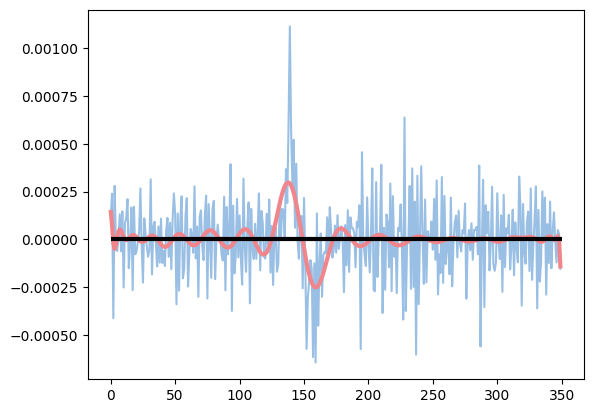

In [48]:
spike_rates_diff = np.diff(spike_rates_all, axis=1)
mean_diff = spike_rates_diff.mean(axis=0)
std_diff = spike_rates_diff.std(axis=0)

with PdfPages("figure/peth_diff.pdf") as pdf:
    from numpy.polynomial.polynomial import Polynomial
    p = Polynomial.fit(range(350), mean_diff[:350], deg=35) 

    plt.figure()
    plt.plot(range(350), mean_diff[:350], alpha=0.7, color = "#70A5D9")
    plt.plot(range(350), p(range(350)), color='#F0868C',linewidth = 3)
    plt.hlines(y = 0, xmin=0, xmax=350, colors= 'black', linewidth = 3)
    pdf.savefig()

In [50]:
roots = p.roots()[(p.roots() < 180) & (p.roots() > 115)]

In [52]:
roots = [124.79516996, 148.77318039, 172.51247019]

In [53]:
from scipy import stats

num_neurons = len(spike_inf['Neuron'].unique())
num_images = 117
result_matrix = np.zeros((num_neurons, num_images), dtype=int)
pvalue_matrix = np.ones((num_neurons, num_images))
diff_matrix = np.ones((num_neurons, num_images))

for image in range(1, 118):
    num = 0
    for neuron_idx, neuron in enumerate(spike_inf['Neuron'].unique()):

        neuron_df = spike_inf[spike_inf['Neuron'] == neuron]

        dates = trigger_time[trigger_time['image'] == image]['date'].unique()
        date_indices = np.arange(len(dates))  

        spike_rates_first = []
        spike_rates_second = []

        for date in dates:
            trigger_time_temp = trigger_time[(trigger_time['image'] == image) & (trigger_time['date'] == date)]
            all_spikes_first = []
            all_spikes_second = []

            for index, row in trigger_time_temp.iterrows():
                start = row['start'] + roots[0]/499 * 20000 - 5000
                end = row['start'] + roots[2]/499 * 20000 - 5000

                filtered_spikes_first = neuron_df[(neuron_df['date'] == date) &
                                                  (neuron_df['time'] >= start) &
                                                  (neuron_df['time'] <= end)]

                if not filtered_spikes_first.empty:
                    relative_spikes_first = filtered_spikes_first['time'] - start
                    all_spikes_first.extend(relative_spikes_first)

                start_2 = row['start'] -(end - start)
                end_2 = row['start'] 

                filtered_spikes_second = neuron_df[(neuron_df['date'] == date) &
                                                   (neuron_df['time'] >= start_2) &
                                                   (neuron_df['time'] <= end_2)]

                if not filtered_spikes_second.empty:
                    relative_spikes_second = filtered_spikes_second['time'] - start_2
                    all_spikes_second.extend(relative_spikes_second)

            if all_spikes_first:
                time_bins_first = np.linspace(0, max(all_spikes_first), 100)
                spike_counts_first, _ = np.histogram(all_spikes_first, bins=time_bins_first)
                spike_rate_first = spike_counts_first / (time_bins_first[1] - time_bins_first[0])
                spike_rates_first.append(spike_rate_first)

            if all_spikes_second:
                time_bins_second = np.linspace(0, max(all_spikes_second), 100)
                spike_counts_second, _ = np.histogram(all_spikes_second, bins=time_bins_second)
                spike_rate_second = spike_counts_second / (time_bins_second[1] - time_bins_second[0])
                spike_rates_second.append(spike_rate_second)

        mean_spike_rate_first = np.mean(spike_rates_first, axis=0) if spike_rates_first else np.zeros(100)
        mean_spike_rate_second = np.mean(spike_rates_second, axis=0) if spike_rates_second else np.zeros(100)

        t_stat, p_value = stats.ttest_ind(mean_spike_rate_first, mean_spike_rate_second, nan_policy='omit')

        if p_value < 0.01:
            if np.mean(mean_spike_rate_first) > np.mean(mean_spike_rate_second):
                result_matrix[neuron_idx, image-1] = 1
                diff_matrix[neuron_idx, image-1] = np.mean(mean_spike_rate_first)/np.mean(mean_spike_rate_second)
            else:
                result_matrix[neuron_idx, image-1] = -1
                diff_matrix[neuron_idx, image-1] = np.mean(mean_spike_rate_second)/np.mean(mean_spike_rate_first)
        else:
            result_matrix[neuron_idx, image-1] = 0
            diff_matrix[neuron_idx, image-1] = 1
        pvalue_matrix[neuron_idx, image-1] = p_value
        


neurons = spike_inf['Neuron'].unique()
images = range(1, 118)
result_df = pd.DataFrame(result_matrix, index=neurons, columns=images)
pvalue_df = pd.DataFrame(pvalue_matrix, index=neurons, columns=images)
diff_df = pd.DataFrame(diff_matrix, index=neurons, columns=images)

result_df.to_csv("glimpse_result_df.csv")
pvalue_df.to_csv("glimpse_pvalue_df.csv")
diff_df.to_csv("glimpse_diff_df.csv")

In [54]:
from matplotlib.colors import ListedColormap

with PdfPages("figure/glimpse_neuron_reaction.pdf") as pdf:
    cmap = ListedColormap(['#70A5D9', 'lightgrey', '#F0868C'])
    plt.figure(figsize=(4, 4))
    ax = sns.heatmap(result_df, cmap=cmap, cbar=True)
    pdf.savefig()
    plt.close()

    cmap = ListedColormap(['#70A5D9', 'lightgrey', '#F0868C'])
    plt.figure(figsize=(4, 9))
    ax = sns.heatmap(result_df.T, cmap=cmap, cbar=False, linecolor="white",   
    linewidths=0.3)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.axis('off') 
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(4, 4))
    ax = sns.heatmap(-np.log(pvalue_df), cmap='coolwarm', cbar=True, annot=True,fmt='.2f',
    annot_kws={"size": 4})
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.axis('off') 
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(4, 4))
    ax = sns.heatmap(-np.log(pvalue_df), cmap='coolwarm', cbar=False, annot=False,fmt='.2f',
    annot_kws={"size": 4}, vmax=25)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.axis('off') 
    pdf.savefig()
    plt.close()

In [55]:
from scipy import stats

num_neurons = len(spike_inf['Neuron'].unique())
num_images = 117
result_matrix = np.zeros((num_neurons, num_images), dtype=int)
pvalue_matrix = np.ones((num_neurons, num_images))
diff_matrix = np.ones((num_neurons, num_images))

for image in range(1, 118):
    num = 0
    for neuron_idx, neuron in enumerate(spike_inf['Neuron'].unique()):

        neuron_df = spike_inf[spike_inf['Neuron'] == neuron]

        dates = trigger_time[trigger_time['image'] == image]['date'].unique()
        date_indices = np.arange(len(dates))  

        spike_rates_first = []
        spike_rates_second = []

        for date in dates:
            trigger_time_temp = trigger_time[(trigger_time['image'] == image) & (trigger_time['date'] == date)]
            all_spikes_first = []
            all_spikes_second = []

            for index, row in trigger_time_temp.iterrows():
                start = row['start'] + roots[2]/499 * 20000 - 5000
                end = row['end'] + 5000

                filtered_spikes_first = neuron_df[(neuron_df['date'] == date) &
                                                  (neuron_df['time'] >= start) &
                                                  (neuron_df['time'] <= end)]

                if not filtered_spikes_first.empty:
                    relative_spikes_first = filtered_spikes_first['time'] - start
                    all_spikes_first.extend(relative_spikes_first)

                start_2 = row['start'] - (end - start)
                end_2 = row['start'] 

                filtered_spikes_second = neuron_df[(neuron_df['date'] == date) &
                                                   (neuron_df['time'] >= start_2) &
                                                   (neuron_df['time'] <= end_2)]

                if not filtered_spikes_second.empty:
                    relative_spikes_second = filtered_spikes_second['time'] - start_2
                    all_spikes_second.extend(relative_spikes_second)

            if all_spikes_first:
                time_bins_first = np.linspace(0, max(all_spikes_first), 500)
                spike_counts_first, _ = np.histogram(all_spikes_first, bins=time_bins_first)
                spike_rate_first = spike_counts_first / (time_bins_first[1] - time_bins_first[0])
                spike_rates_first.append(spike_rate_first)

            if all_spikes_second:
                time_bins_second = np.linspace(0, max(all_spikes_second), 500)
                spike_counts_second, _ = np.histogram(all_spikes_second, bins=time_bins_second)
                spike_rate_second = spike_counts_second / (time_bins_second[1] - time_bins_second[0])
                spike_rates_second.append(spike_rate_second)

        mean_spike_rate_first = np.mean(spike_rates_first, axis=0) if spike_rates_first else np.zeros(100)
        mean_spike_rate_second = np.mean(spike_rates_second, axis=0) if spike_rates_second else np.zeros(100)

        t_stat, p_value = stats.ttest_ind(mean_spike_rate_first, mean_spike_rate_second, nan_policy='omit')

        if p_value < 1e-3:
            if np.mean(mean_spike_rate_first) > np.mean(mean_spike_rate_second):
                result_matrix[neuron_idx, image-1] = 1
            else:
                result_matrix[neuron_idx, image-1] = -1
        else:
            result_matrix[neuron_idx, image-1] = 0
        pvalue_matrix[neuron_idx, image-1] = p_value
        diff_matrix[neuron_idx, image-1] = np.mean(mean_spike_rate_first)/np.mean(mean_spike_rate_second)


neurons = spike_inf['Neuron'].unique()
images = range(1, 118)
result_df = pd.DataFrame(result_matrix, index=neurons, columns=images)
pvalue_df = pd.DataFrame(pvalue_matrix, index=neurons, columns=images)
diff_df = pd.DataFrame(diff_matrix, index=neurons, columns=images)

result_df.to_csv("last_result_df.csv")
pvalue_df.to_csv("last_pvalue_df.csv")
diff_df.to_csv("last_diff_df.csv")

In [56]:
from matplotlib.colors import ListedColormap

with PdfPages("figure/last_neuron_reaction.pdf") as pdf:
    cmap = ListedColormap(['#70A5D9', 'lightgrey', '#F0868C'])
    plt.figure(figsize=(4, 4))
    ax = sns.heatmap(result_df, cmap=cmap, cbar=True)
    pdf.savefig()
    plt.close()

    cmap = ListedColormap(['#70A5D9', 'lightgrey', '#F0868C'])
    plt.figure(figsize=(4, 9))
    ax = sns.heatmap(result_df.T, cmap=cmap, cbar=False, linecolor="white",   
    linewidths=0.3)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.axis('off') 
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(4, 4))
    ax = sns.heatmap(-np.log(pvalue_df), cmap='coolwarm', cbar=True, annot=True,fmt='.2f',
    annot_kws={"size": 4})
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.axis('off') 
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(4, 4))
    ax = sns.heatmap(-np.log(pvalue_df), cmap='coolwarm', cbar=False, annot=False,fmt='.2f',
    annot_kws={"size": 4}, vmax=25)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.axis('off') 
    pdf.savefig()
    plt.close()

In [57]:
import numpy as np
import pandas as pd
import quantities as pq
from neo import SpikeTrain
def generate_binned_spiketrains(trigger_time_df, spike_inf_df, target_image):
    """
    生成指定image下的分箱脉冲矩阵
    
    参数
    ----
    trigger_time_df : pd.DataFrame
        列包括：start, end, image, date, order
    spike_inf_df : pd.DataFrame
        列包括：time, neuron, date
    target_image : str/int
        目标图像标识
    
    返回
    ----
    binned_data : list of ndarray
        [
            # Trial 1 的矩阵 (neurons × 100 bins)
            array([[n0_bin1_count, n0_bin2_count, ...],
                   [n1_bin1_count, n1_bin2_count, ...],
                   ...]),
            # Trial 2
            ...
        ]
    """
    # =====================================
    # 步骤 1: 筛选目标试次并转换时间单位
    # =====================================
    mask = (trigger_time_df['image'] == target_image)
    target_triggers = trigger_time_df[mask].sort_values('order')
    
    # 转换时间单位 (0.1ms → 秒)
    target_triggers = target_triggers.copy()
    target_triggers['start'] = target_triggers['start'] * 0.1e-3
    target_triggers['end'] = target_triggers['end'] * 0.1e-3

    # =====================================
    # 步骤 2: 处理神经脉冲数据
    # =====================================
    target_spikes = spike_inf_df.copy()
    target_spikes['time'] = target_spikes['time'] * 0.1e-3 
    
    # 获取所有唯一神经元ID并排序（基于完整数据集）
    all_neuron_ids = sorted(spike_inf_df['Neuron'].unique()) if not spike_inf_df.empty else []

    # =====================================
    # 步骤 3: 分箱处理每个试次
    # =====================================
    binned_data = []
    for _, trial in target_triggers.iterrows():
        trial_start = trial['start']
        trial_end = trial['end']
        trial_duration = trial_end - trial_start
        
        spike_mask = (target_spikes['time'] >= trial_start) & (target_spikes['time'] < trial_end)
        trial_spikes = target_spikes[spike_mask].copy()
        trial_spikes['rel_time'] = trial_spikes['time'] - trial_start
        
        bin_matrix = np.zeros((len(all_neuron_ids), 100), dtype=int)
        
        neuron_groups = trial_spikes.groupby('Neuron')
        for neuron_idx, neuron_id in enumerate(all_neuron_ids):
            if neuron_id in neuron_groups.groups:
                group = neuron_groups.get_group(neuron_id)
                times = group['rel_time'].values
                
                counts, _ = np.histogram(times, bins=100, range=(0, trial_duration))
                bin_matrix[neuron_idx] = counts
                
        binned_data.append(bin_matrix)
    
    return binned_data

In [58]:
for date in date_order:
    for image in range(1, 118):
        num = 1

        temp = trigger_time[trigger_time['date'] == int(date)]
        temp_spike = spike_inf[spike_inf['date'] == int(date)]
        spike_train = generate_binned_spiketrains(temp, temp_spike, image)
        for i in range(len(spike_train)):
            #if spike_train[i].shape[0] != 19:
            #    print(f'error: {date}, {image}')
            #    break
            np.save(f'/media/ubuntu/sda/data/filter_neuron/mouse_5/natural_image/seg_new/{date}_{image}_{num}.npy', spike_train[i])
            num += 1


- SRP

In [59]:
srp_image_data = {}
for image in range(1, 118):
    temp_1 = image_mean_spike_rate_data[image][30222].iloc[:, 8:10].mean(axis = 1)
    temp_2 = pd.DataFrame()
    for date in image_mean_spike_rate_data[image].keys():
        if date != 30222:
            temp_2 = pd.concat((temp_2, image_mean_spike_rate_data[image][date].iloc[:, 8:10].mean(axis = 1)), axis=1)
    temp_2 = temp_2.mean(axis=1)

    srp_image_data[image] = pd.concat((pd.DataFrame(temp_1), temp_2), axis=1)

In [65]:
srp_neuron_data = {}
neuron_index = ['Neuron_1', 'Neuron_7', 'Neuron_2', 'Neuron_4', 'Neuron_6',
       'Neuron_3', 'Neuron_5']
for i in range(7):
    srp_neuron_data[neuron_index[i]] = pd.DataFrame()
    for image in range(1, 118):
        srp_neuron_data[neuron_index[i]] = pd.concat((srp_neuron_data[neuron_index[i]], srp_image_data[image].iloc[i, :]), axis=1)

In [66]:
from scipy.stats import wilcoxon
from scipy.stats import ttest_ind
import math


def plot_wilcoxon_test(data_dict):
    with PdfPages("figure/srp_dotplot.pdf") as pdf:
        for name, df in data_dict.items():
            df = df.T
            df.columns = ['Month 1', 'Month n']
            melted_df = df.melt(var_name='group', value_name='value')
            melted_df['group'] = melted_df['group'].astype(str)
            pos_mapping = {'Month 1': 0.4, 'Month n': 0.6}
            melted_df['x_pos'] = melted_df['group'].map(pos_mapping)

            plt.figure(figsize=(4, 6))

            ax = sns.stripplot(
                x='x_pos',
                y='value',
                data=melted_df,
                jitter=0.25,
                palette=['#70A5D9', '#F0868C'],
                alpha=0.9,
                size=8,                
                edgecolor='black',     
                linewidth=0.8,
            )
            sns.boxplot(
                x='x_pos',
                y='value',
                data=melted_df,
                boxprops=dict(
                    facecolor='None',
                    linewidth=1,       
                    linestyle='-'
                ),
                width=0.6,            
                medianprops=dict(
                    linewidth=2,      
                    color='black'  
                ),
                showfliers = False,
                whiskerprops=dict(linewidth=0.8),
                capprops=dict(linewidth=0.8),
                flierprops=dict(
                    marker='o',
                    markersize=3,
                    markeredgecolor='black'
                ),
                ax=ax
            )

            ax.spines[['top', 'right']].set_visible(False)
            ax.spines[['left', 'bottom']].set_linewidth(0.8)

            plt.xlabel('Group', fontsize=11, labelpad=8)
            plt.ylabel('Value', fontsize=11, labelpad=8)
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10)

            group0 = df.iloc[:, 0].values
            group1 = df.iloc[:, 1].values

            _, p_value = ttest_ind(group0, group1)

            y_max = melted_df['value'].max()
            y_line = y_max * 1.05
            y_text = y_max * 1.08
            
            ax.plot([0, 1], [y_line, y_line], color='k', lw=1)
            ax.text(
                0.5, y_text,
                f'p = {p_value:.2e}',
                ha='center',
                va='bottom',
                fontsize=10,
                fontweight='normal'
            )

            plt.title(name, fontsize=12, pad=12)
            plt.tight_layout()
            pdf.savefig()
            plt.close()

plot_wilcoxon_test(srp_neuron_data)


In [78]:
srp_neuron = ['Neuron_7']

In [80]:

temp = cluster_inf[(cluster_inf['date'] == 30222) & (cluster_inf['Neuron'].isin(srp_neuron))]
with PdfPages('figure/srp_neuron_position.pdf') as pdf:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x = temp['position_1'],
                    y = temp['position_2'],
                    hue = temp['Neuron'],
                    size=20)
    pdf.savefig()
    plt.close()